In [1]:
# 1. Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 2. Load dataset
df = pd.read_csv("spam.csv", encoding='latin-1')
df.head()


,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
df = pd.read_csv("spam.csv", encoding='latin-1')
print(df.columns)


Index(['Category', 'Message'], dtype='object')


In [7]:
df = df.iloc[:, :2]  # Keep first 2 columns (v1 and v2)
df.columns = ['label', 'message']  # Rename for clarity
df.head()


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


ham     4825
spam     747
Name: label, dtype: int64


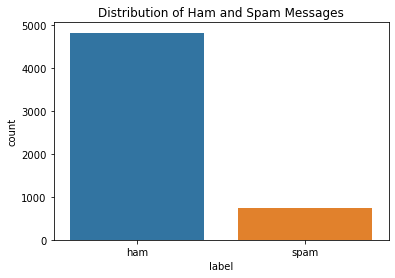

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

print(df['label'].value_counts())

sns.countplot(data=df, x='label')
plt.title("Distribution of Ham and Spam Messages")
plt.show()


In [9]:
df['label_num'] = df['label'].map({'ham': 0, 'spam': 1})


In [10]:
X = df['message']
y = df['label_num']


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english')
X_tfidf = tfidf.fit_transform(X)


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)


In [13]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train, y_train)


MultinomialNB()

Accuracy: 0.9775784753363229

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       966
           1       1.00      0.83      0.91       149

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



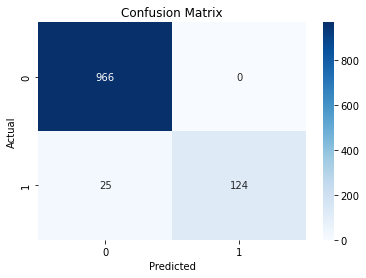

In [14]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
